In [1]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from albumentations import HorizontalFlip, CoarseDropout, RandomBrightnessContrast, Compose, VerticalFlip, RandomRotate90, Transpose
import tensorflow as tf

In [2]:
def load_dataset(path):
    images = sorted(glob(os.path.join(path, "images", "*")))
    masks = sorted(glob(os.path.join(path, "masks", "*")))
    return images, masks

In [3]:
def split_dataset(path):
    train_x = sorted(glob(os.path.join(path, "train", "images", "*")))
    train_y = sorted(glob(os.path.join(path, "train", "masks", "*")))

    valid_x = sorted(glob(os.path.join(path, "valid", "images", "*")))
    valid_y = sorted(glob(os.path.join(path, "valid", "masks", "*")))

    test_x = sorted(glob(os.path.join(path, "test", "images", "*")))
    test_y = sorted(glob(os.path.join(path, "test", "masks", "*")))

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

In [4]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [25]:
def save_dataset(images, masks, save_dir, augment):
    for x, y in tqdm(zip(images, masks), total=len(images)):
        name = x.split("\\")[-1].split(".")[0]

        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_COLOR)

        if augment == True:
            aug = HorizontalFlip(p=1)
            augmented = aug(image=x, mask=y)
            x1 = augmented["image"]
            y1 = augmented["mask"]

            aug = CoarseDropout(p=1, max_holes=10, max_height=64, max_width=64)
            augmented = aug(image=x, mask=y)
            x2 = augmented["image"]
            y2 = augmented["mask"]

            aug = RandomBrightnessContrast(p=1.0)
            augmented = aug(image=x, mask=y)
            x3 = augmented["image"]
            y3 = augmented["mask"]

            aug_x = [x, x1, x2, x3]
            aug_y = [y, y1, y2, y3]

        else:
            aug_x = [x]
            aug_y = [y]

        idx = 0
        for ax, ay in zip(aug_x, aug_y):
            aug_name = f"{name}_{idx}.png"

            save_image_path = os.path.join(save_dir, "images", aug_name)
            save_mask_path = os.path.join(save_dir, "masks", aug_name)

            cv2.imwrite(save_image_path, ax)
            cv2.imwrite(save_mask_path, ay)

            idx += 1

In [26]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = split_dataset("My_VineNet/non aug")
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")
print(f"Train: {len(test_x)} - {len(test_y)}")

Train: 500 - 500
Valid: 119 - 119
Train: 100 - 100


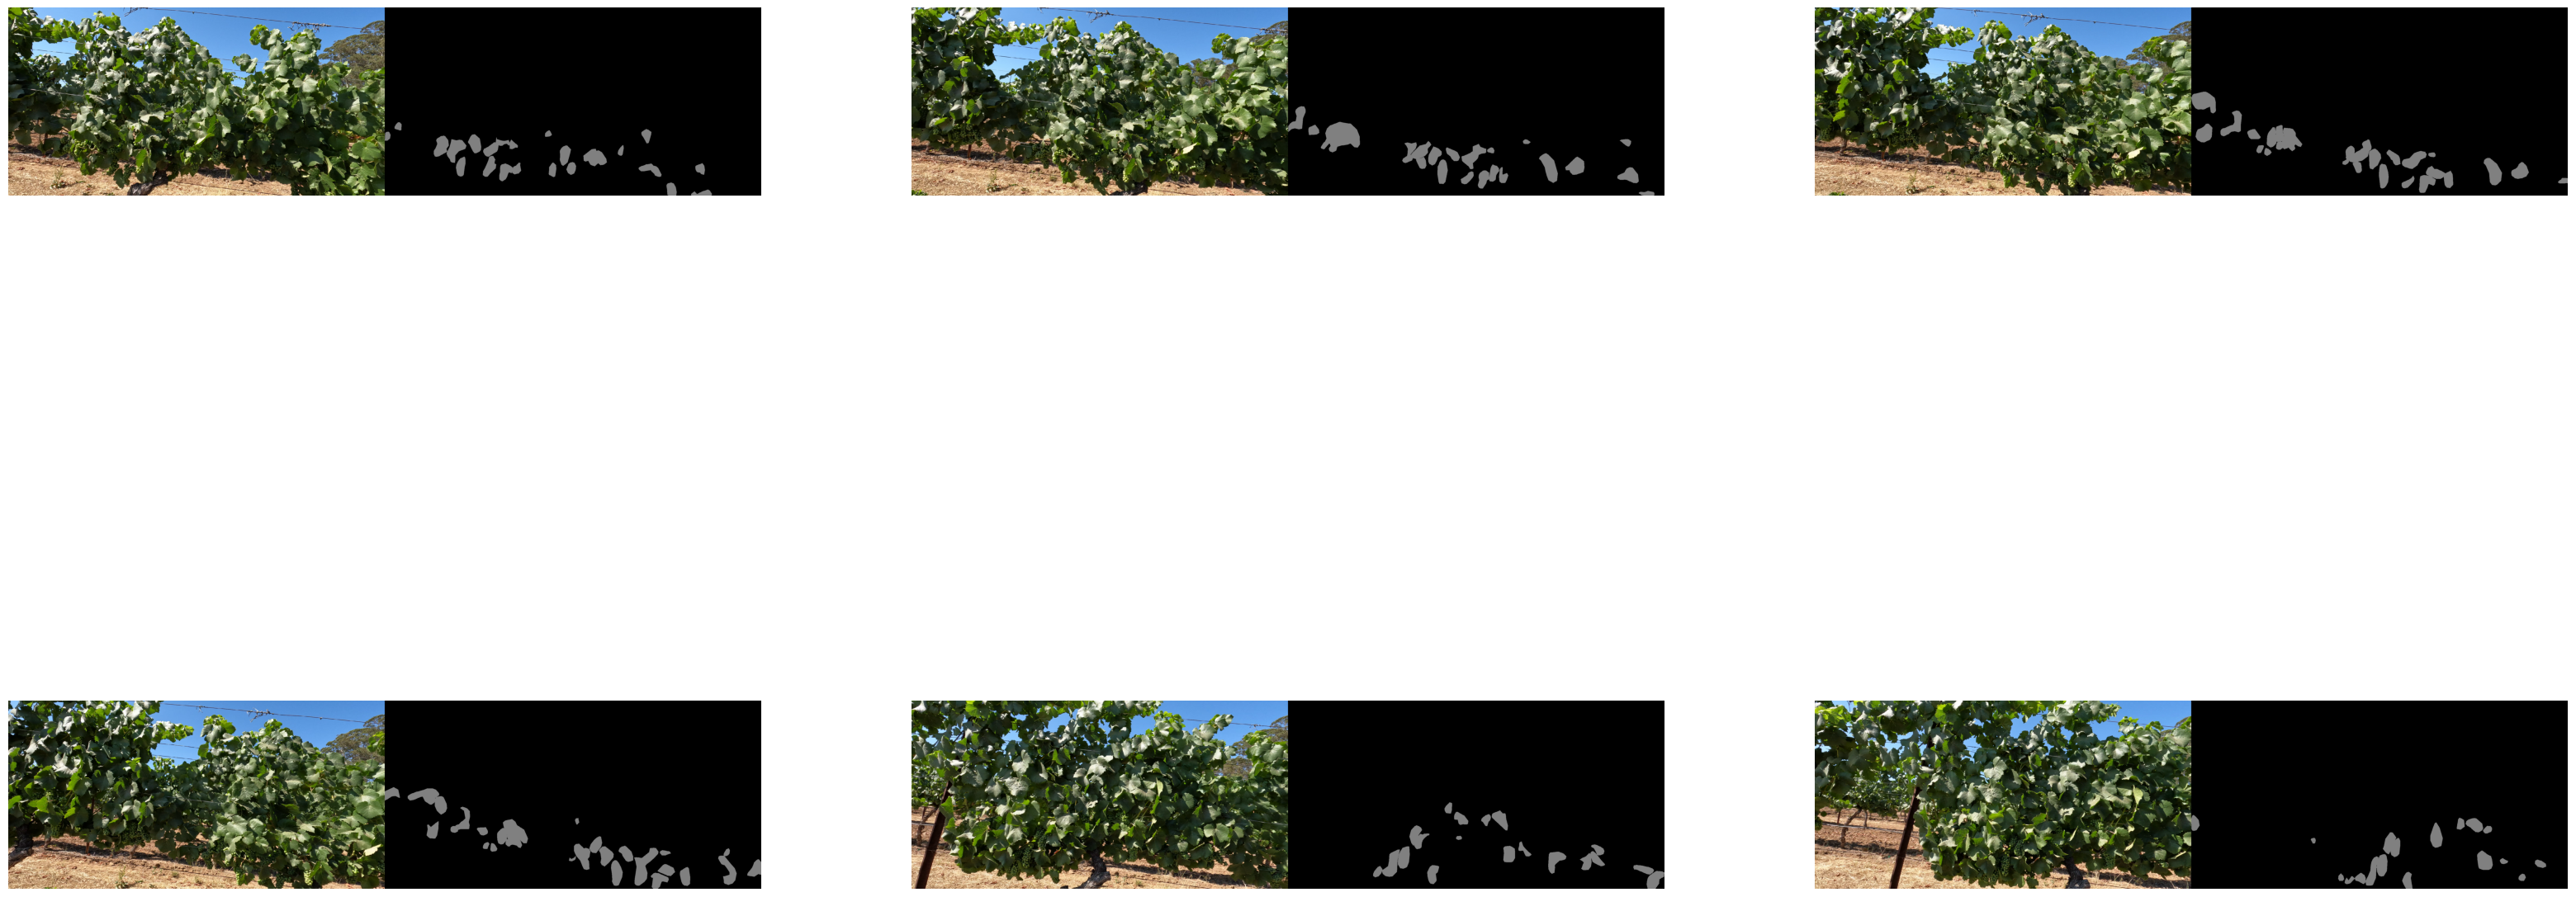

In [27]:
from imshowtools import imshow

cat = []
for x, y in zip(train_x[0:6], train_y[0:6]):
    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB) 

    y = cv2.imread(y, cv2.IMREAD_COLOR)

    z = np.concatenate([x, y], axis=1)
    cat.append(z)

imshow(*cat, size=(40,20), columns=3)



In [28]:
save_dir = os.path.join("My_VineNet", "aug")
for item in ["train", "valid", "test"]:
    create_dir(os.path.join(save_dir, item, "images"))
    create_dir(os.path.join(save_dir, item, "masks"))

In [29]:
print(save_dir)

My_VineNet\aug


In [31]:

# save_dataset(train_x, train_y, os.path.join(save_dir, "train"), True)

100%|██████████| 500/500 [03:23<00:00,  2.46it/s]


In [ ]:
# save_dataset(test_x, test_y, os.path.join(save_dir, "test"), False)

In [ ]:
# save_dataset(valid_x, valid_y, os.path.join(save_dir, "valid"), False)